# Assignment on preprocessing

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data from local folder

In [87]:
data=pd.read_csv(r'C:\Users\sruth\OneDrive\Desktop\titanic_dataset.csv') 

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Make ‘PassengerId’ as the index column


In [90]:
data=pd.read_csv(r'C:\Users\sruth\OneDrive\Desktop\titanic_dataset.csv',index_col='PassengerId')

In [91]:

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Basic details of the dataset


In [92]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
data.shape

(891, 11)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [95]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [97]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

There are 891 rows and 11 columns out of which 6 are numerical datatype(2 float type and 4 int type) while the rest 5 are object data type.


In [98]:
survived_count=data['Survived'].value_counts()
print(survived_count)

0    549
1    342
Name: Survived, dtype: int64


In [99]:
gender_count = data['Sex'].value_counts()
print(gender_count)

male      577
female    314
Name: Sex, dtype: int64


In [100]:
survi_counts = data[['Survived', 'Sex']].value_counts()
print(survi_counts)

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64


Out of the 891 passengers, only 342 passengers were survived.
Survived males :109
Survived Females:233   
rest of them did not survived.


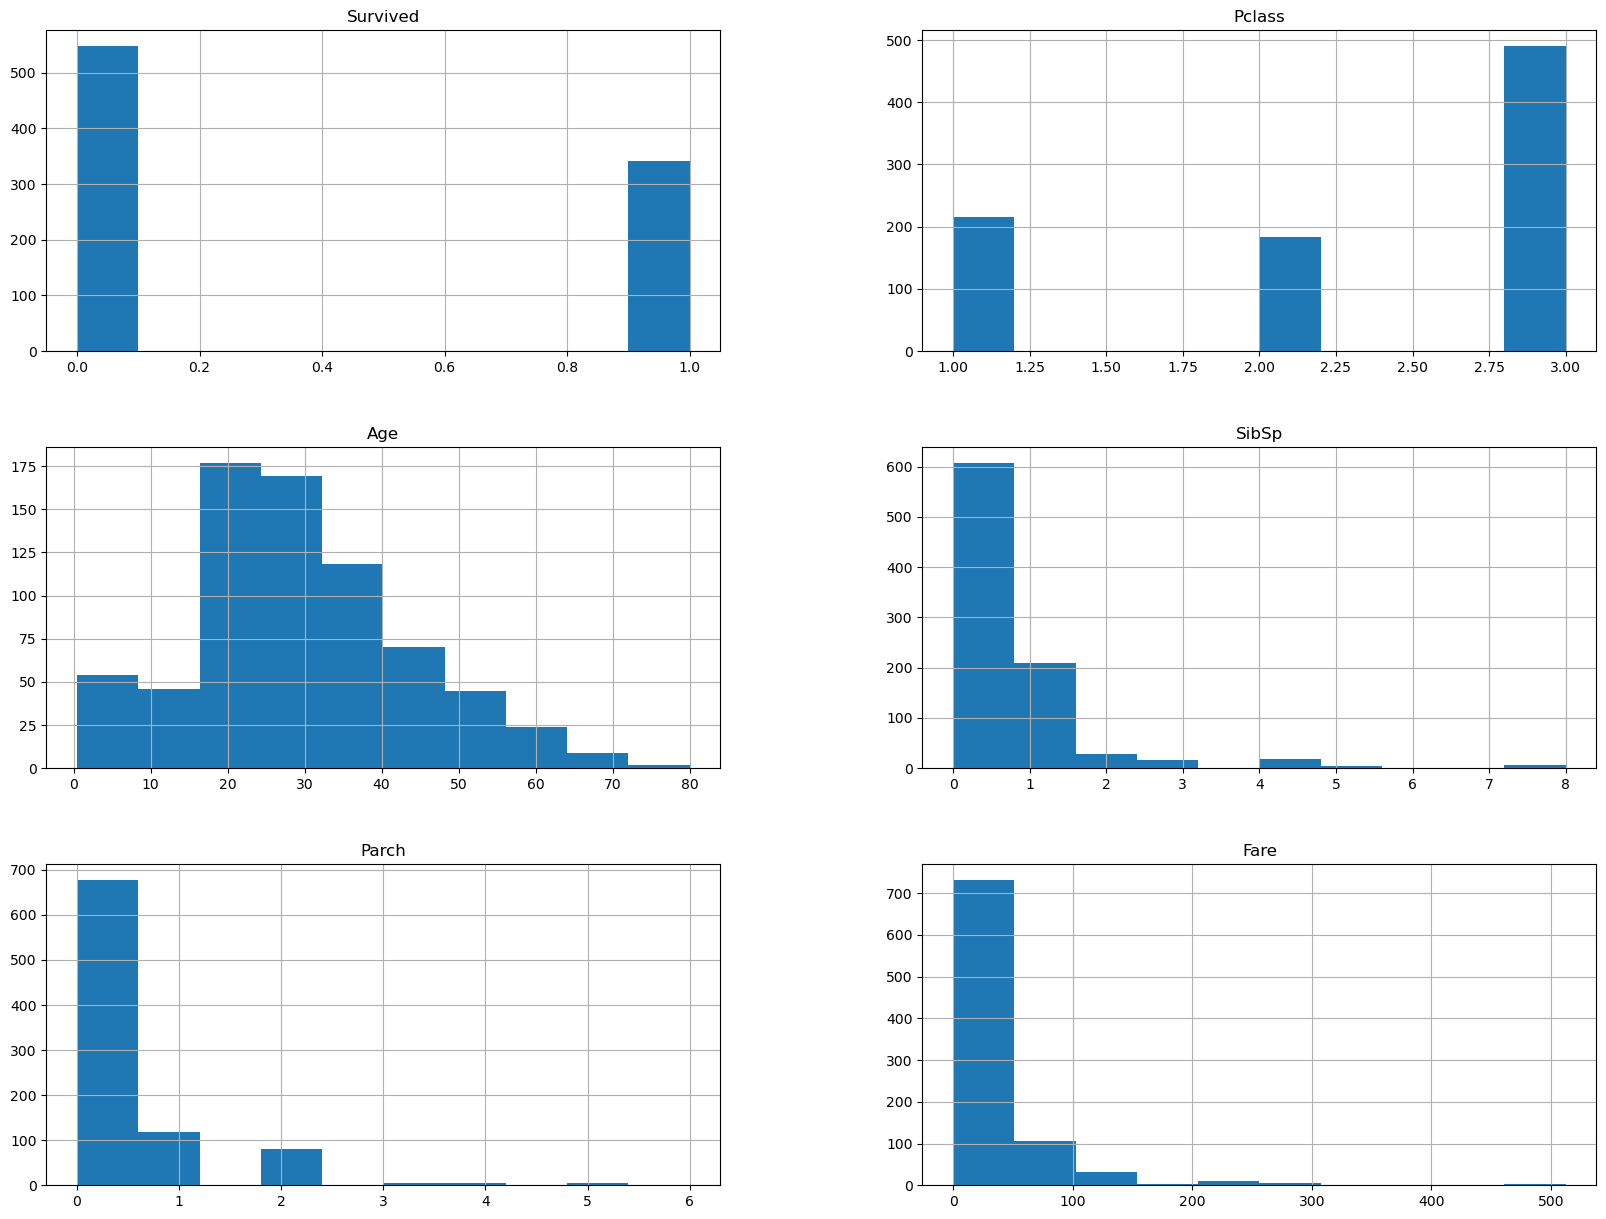

In [101]:

freqgraph = data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Missing Value Handling

In [102]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

missing values found in Age:177 , Cabin:687 , Embark:2

In [103]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [104]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
data['Cabin'].nunique()

147

In [106]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [107]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().values[0])


In [108]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode().values[0])


In [109]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Outlier Handling

In [110]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

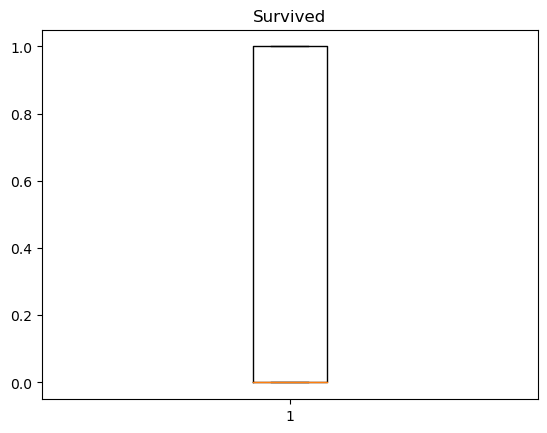

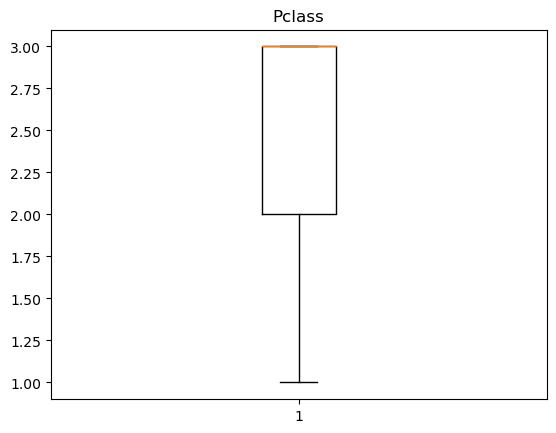

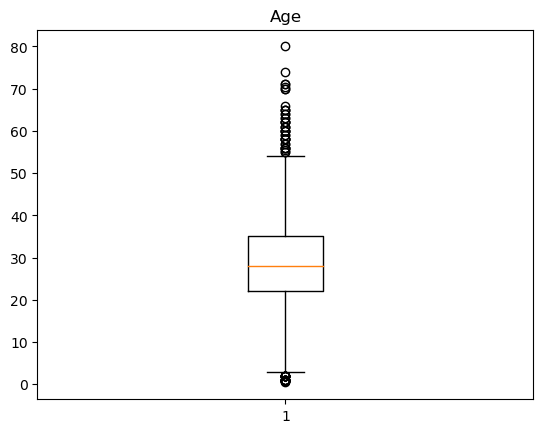

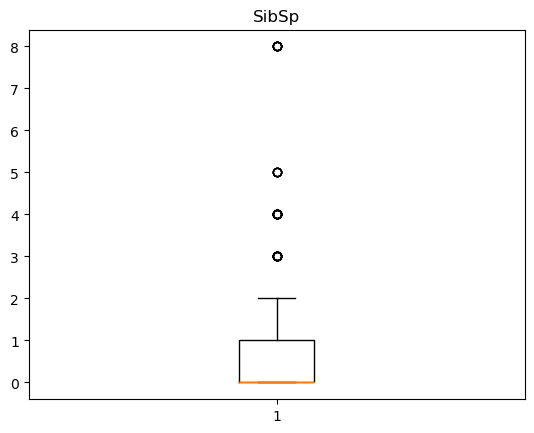

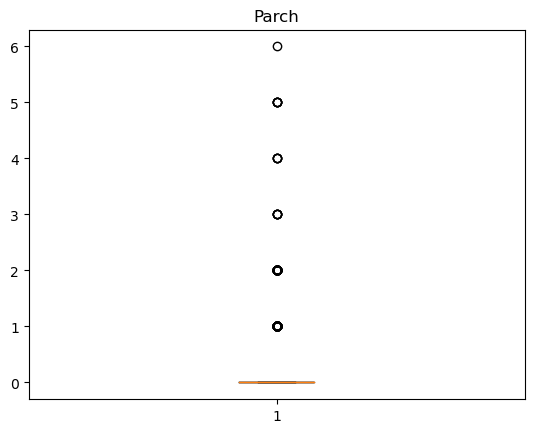

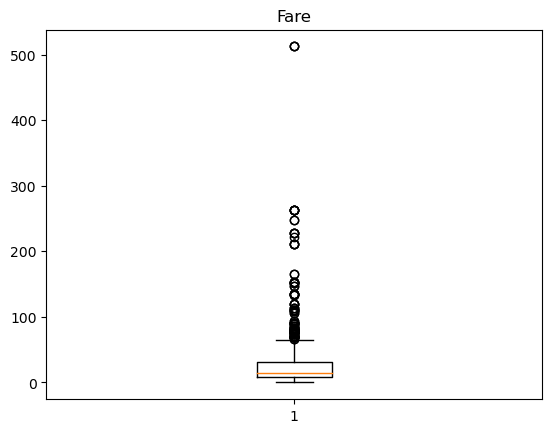

In [112]:
num_cols = ['Survived', 'Pclass','Age', 'SibSp', 'Parch','Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [113]:
Qa1 = np.percentile(data['Age'],25,interpolation='midpoint')
Qa2 = np.percentile(data['Age'],50,interpolation='midpoint')
Qa3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [114]:
print(Qa1)
print(Qa2)
print(Qa3)

22.0
28.0
35.0


In [115]:
data['Age'].median()

28.0

In [116]:
IQRa = Qa3-Qa1

In [117]:
print(IQRa)

13.0


In [118]:
up_lima = Qa3+1.5*IQRa
low_lima = Qa1-1.5*IQRa

In [119]:
print(up_lima)
print(low_lima)

54.5
2.5


In [120]:
outliers = []
for x in data['Age']:
    if(x>up_lima) or (x<low_lima):
        outliers.append(x)

In [121]:
print(outliers,end="")

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]

In [122]:
ind_loc = (data['Age'] > up_lima) | (data['Age'] < low_lima)
ind_list = data.loc[ind_loc].index.tolist()

In [123]:
data['Age'] = data['Age'].apply(lambda x: low_lima if x < low_lima else up_lima if x > up_lima else x)

In [124]:
data.shape

(891, 11)

In [125]:
Qs1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Qs2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Qs3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

In [126]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
print(Qs1)
print(Qs2)
print(Qs3)

0.0
0.0
1.0


In [128]:
data['SibSp'].median()

0.0

In [129]:
IQRs = Qs3-Qs1

In [130]:
print(IQRs)

1.0


In [131]:
up_lims = Qs3+1.5*IQRs
low_lims = Qs1-1.5*IQRs

In [132]:
print(up_lims)
print(low_lims)

2.5
-1.5


In [133]:
outliers = []
for y in data['SibSp']:
    if(y>up_lims) or (y<low_lims):
        outliers.append(x)

In [134]:
print(outliers,end='')

[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]

In [135]:
len(outliers)

46

In [136]:
ind_locs = data['SibSp'] > up_lims
ind_lists=data.loc[ind_locs].index.tolist()



In [137]:
len(ind_lists)

46

In [138]:
data['SibSp'] = data['SibSp'].apply(lambda y: low_lims if y< low_lims else up_lims if y > up_lims else y)

In [139]:
data.shape

(891, 11)

In [140]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [141]:
Qf1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Qf2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Qf3 = np.percentile(data['Fare'], 75, interpolation='midpoint')


In [142]:
print(Qf1)
print(Qf2)
print(Qf3)

7.9104
14.4542
31.0


In [143]:
data['Fare'].median()

14.4542

In [144]:
IQRf = Qf3-Qf1

In [145]:
print(IQRf)

23.0896


In [146]:

up_limf = Qf3 + 1.5*IQRf
low_limf = Qf1 - 1.5*IQRf

In [147]:

print(up_limf)
print(low_limf)

65.6344
-26.724


In [148]:
outliers=[]
for z in data['Fare']:
    if(z > up_limf) or (z < low_limf):
        outliers.append(z)


In [149]:
print(outliers,end="")

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]

In [150]:
ind_locf = (data['Fare'] > up_lima) | (data['Fare'] < low_lima)
ind_listf = data.loc[ind_locf].index.tolist()

In [151]:
data['Fare'] = data['Fare'].apply(lambda z: low_limf if z < low_limf else up_limf if z > up_limf else z)

In [152]:
data.shape

(891, 11)

In [153]:
X = data.drop('Survived', axis=1)  
y = data['Survived'] 

In [154]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


# Min_Max Scaling

In [155]:
X1 = data.drop('Survived', axis=1)
y1 = data['Survived']

In [156]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


In [157]:
X2=X1.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [158]:
X2.head()


,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500


In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
min_max=MinMaxScaler()


In [161]:
scaled_data=min_max.fit_transform(X2)

In [162]:
type(scaled_data)

numpy.ndarray

In [163]:
scaled_data=pd.DataFrame(scaled_data,columns=['Pclass','Age','SibSp', 'Parch','Fare'])

In [164]:
scaled_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
print(scaled_data)

     Pclass       Age  SibSp     Parch      Fare
0       1.0  0.375000    0.4  0.000000  0.110460
1       0.0  0.682692    0.4  0.000000  1.000000
2       1.0  0.451923    0.0  0.000000  0.120745
3       0.0  0.625000    0.4  0.000000  0.809027
4       1.0  0.625000    0.0  0.000000  0.122649
..      ...       ...    ...       ...       ...
886     0.5  0.471154    0.0  0.000000  0.198067
887     0.0  0.317308    0.0  0.000000  0.457077
888     1.0  0.490385    0.4  0.333333  0.357282
889     0.0  0.451923    0.0  0.000000  0.457077
890     1.0  0.567308    0.0  0.000000  0.118078

[891 rows x 5 columns]
